In [62]:
import datetime as dt
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import statsmodels as sm
import matplotlib.pyplot as plt

pio.templates.default = 'ggplot2'
plt.style.use('ggplot')

In [63]:
# Reading the CSV file
df = pd.read_csv('geram18.csv')
df

,Open,Minimum,Maximum,Close,Date,Position
0,"34,357,000","34,316,000","34,865,000","34,487,000",2024/05/02,High
1,"34,600,000","34,013,000","34,600,000","34,371,000",2024/05/01,Low
2,"34,985,000","34,371,000","35,777,000","34,570,000",2024/04/30,Low
3,"33,263,000","33,240,000","35,216,000","35,004,000",2024/04/29,High
4,"34,369,000","33,132,000","34,501,000","33,265,000",2024/04/28,Low
...,...,...,...,...,...,...
3381,"1,040,000","1,040,000","1,040,000","1,040,000",2013/07/27,High
3382,"1,030,000","1,030,000","1,030,000","1,030,000",2013/07/26,High
3383,"1,020,000","1,020,000","1,020,000","1,020,000",2013/07/24,Low
3384,"1,030,000","1,030,000","1,030,000","1,030,000",2013/07/23,High


In [64]:
# Checking the column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3386 entries, 0 to 3385
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Open      3386 non-null   object
 1   Minimum   3386 non-null   object
 2   Maximum   3386 non-null   object
 3   Close     3386 non-null   object
 4   Date      3386 non-null   object
 5   Position  3386 non-null   object
dtypes: object(6)
memory usage: 158.8+ KB


In [65]:
# Converting the prices to float
price_list = ['Open', 'Minimum', 'Maximum', 'Close']
for column in price_list:
    df[column] = df[column].str.replace(',', '')
    df[column] = df[column].astype(float)
df

,Open,Minimum,Maximum,Close,Date,Position
0,34357000.0,34316000.0,34865000.0,34487000.0,2024/05/02,High
1,34600000.0,34013000.0,34600000.0,34371000.0,2024/05/01,Low
2,34985000.0,34371000.0,35777000.0,34570000.0,2024/04/30,Low
3,33263000.0,33240000.0,35216000.0,35004000.0,2024/04/29,High
4,34369000.0,33132000.0,34501000.0,33265000.0,2024/04/28,Low
...,...,...,...,...,...,...
3381,1040000.0,1040000.0,1040000.0,1040000.0,2013/07/27,High
3382,1030000.0,1030000.0,1030000.0,1030000.0,2013/07/26,High
3383,1020000.0,1020000.0,1020000.0,1020000.0,2013/07/24,Low
3384,1030000.0,1030000.0,1030000.0,1030000.0,2013/07/23,High


In [66]:
# Converting the date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,Open,Minimum,Maximum,Close,Date,Position
0,34357000.0,34316000.0,34865000.0,34487000.0,2024-05-02,High
1,34600000.0,34013000.0,34600000.0,34371000.0,2024-05-01,Low
2,34985000.0,34371000.0,35777000.0,34570000.0,2024-04-30,Low
3,33263000.0,33240000.0,35216000.0,35004000.0,2024-04-29,High
4,34369000.0,33132000.0,34501000.0,33265000.0,2024-04-28,Low
...,...,...,...,...,...,...
3381,1040000.0,1040000.0,1040000.0,1040000.0,2013-07-27,High
3382,1030000.0,1030000.0,1030000.0,1030000.0,2013-07-26,High
3383,1020000.0,1020000.0,1020000.0,1020000.0,2013-07-24,Low
3384,1030000.0,1030000.0,1030000.0,1030000.0,2013-07-23,High


In [67]:
df.describe()

,Open,Minimum,Maximum,Close,Date
count,3.386000e+03,3.386000e+03,3.386000e+03,3.386000e+03,3386
mean,7.370368e+06,7.294194e+06,7.443299e+06,7.375134e+06,2019-01-03 07:53:45.753100800
min,8.500000e+05,8.500000e+05,8.600000e+05,8.600000e+05,2013-07-22 00:00:00
25%,1.057312e+06,1.053990e+06,1.060000e+06,1.056800e+06,2016-05-09 06:00:00
50%,3.997500e+06,3.940800e+06,4.036430e+06,3.995000e+06,2019-01-22 12:00:00
75%,1.181200e+07,1.170125e+07,1.199575e+07,1.181875e+07,2021-09-08 18:00:00
max,3.877200e+07,3.765700e+07,3.934400e+07,3.879000e+07,2024-05-02 00:00:00
std,8.081463e+06,7.976923e+06,8.173834e+06,8.086188e+06,NaN


In [68]:
# Dividing the prices by 10**6 for better readability
for column in price_list:
    df[column] = df[column] / 1000000
df

,Open,Minimum,Maximum,Close,Date,Position
0,34.357,34.316,34.865,34.487,2024-05-02,High
1,34.600,34.013,34.600,34.371,2024-05-01,Low
2,34.985,34.371,35.777,34.570,2024-04-30,Low
3,33.263,33.240,35.216,35.004,2024-04-29,High
4,34.369,33.132,34.501,33.265,2024-04-28,Low
...,...,...,...,...,...,...
3381,1.040,1.040,1.040,1.040,2013-07-27,High
3382,1.030,1.030,1.030,1.030,2013-07-26,High
3383,1.020,1.020,1.020,1.020,2013-07-24,Low
3384,1.030,1.030,1.030,1.030,2013-07-23,High


In [69]:
# Sorting the date in ascending order
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df


,Open,Minimum,Maximum,Close,Date,Position
0,1.000,1.000,1.000,1.000,2013-07-22,High
1,1.030,1.030,1.030,1.030,2013-07-23,High
2,1.020,1.020,1.020,1.020,2013-07-24,Low
3,1.030,1.030,1.030,1.030,2013-07-26,High
4,1.040,1.040,1.040,1.040,2013-07-27,High
...,...,...,...,...,...,...
3381,34.369,33.132,34.501,33.265,2024-04-28,Low
3382,33.263,33.240,35.216,35.004,2024-04-29,High
3383,34.985,34.371,35.777,34.570,2024-04-30,Low
3384,34.600,34.013,34.600,34.371,2024-05-01,Low


In [70]:
# # EDA report
# profile = ProfileReport(df, tsmode=True, dark_mode=True, sortby='Date',title='Geram 18')
# profile.to_file("Geram_18_EDA.html")

In [71]:
# Adding the day, month, and year columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df

,Open,Minimum,Maximum,Close,Date,Position,Day,Month,Year
0,1.000,1.000,1.000,1.000,2013-07-22,High,22,7,2013
1,1.030,1.030,1.030,1.030,2013-07-23,High,23,7,2013
2,1.020,1.020,1.020,1.020,2013-07-24,Low,24,7,2013
3,1.030,1.030,1.030,1.030,2013-07-26,High,26,7,2013
4,1.040,1.040,1.040,1.040,2013-07-27,High,27,7,2013
...,...,...,...,...,...,...,...,...,...
3381,34.369,33.132,34.501,33.265,2024-04-28,Low,28,4,2024
3382,33.263,33.240,35.216,35.004,2024-04-29,High,29,4,2024
3383,34.985,34.371,35.777,34.570,2024-04-30,Low,30,4,2024
3384,34.600,34.013,34.600,34.371,2024-05-01,Low,1,5,2024


In [72]:
df['Year'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024], dtype=int32)

In [73]:
# Close price - date graph
px.line(df, x='Date', y='Close')

In [74]:
px.line(df[df['Year'] == 2020], x='Date', y='Close')

---
# Time Series Decomposition

In [75]:
df

,Open,Minimum,Maximum,Close,Date,Position,Day,Month,Year
0,1.000,1.000,1.000,1.000,2013-07-22,High,22,7,2013
1,1.030,1.030,1.030,1.030,2013-07-23,High,23,7,2013
2,1.020,1.020,1.020,1.020,2013-07-24,Low,24,7,2013
3,1.030,1.030,1.030,1.030,2013-07-26,High,26,7,2013
4,1.040,1.040,1.040,1.040,2013-07-27,High,27,7,2013
...,...,...,...,...,...,...,...,...,...
3381,34.369,33.132,34.501,33.265,2024-04-28,Low,28,4,2024
3382,33.263,33.240,35.216,35.004,2024-04-29,High,29,4,2024
3383,34.985,34.371,35.777,34.570,2024-04-30,Low,30,4,2024
3384,34.600,34.013,34.600,34.371,2024-05-01,Low,1,5,2024


In [76]:
# Defining a time series of the prices indexed by date
prices = pd.Series(df['Close'].values, index=df['Date'])
prices = prices.asfreq('D')
print(prices)

Date
2013-07-22     1.000
2013-07-23     1.030
2013-07-24     1.020
2013-07-25       NaN
2013-07-26     1.030
               ...  
2024-04-28    33.265
2024-04-29    35.004
2024-04-30    34.570
2024-05-01    34.371
2024-05-02    34.487
Freq: D, Length: 3938, dtype: float64


In [77]:
prices[prices.isna() == True]

Date
2013-07-25   NaN
2013-07-29   NaN
2013-08-01   NaN
2013-08-08   NaN
2013-08-09   NaN
              ..
2024-04-10   NaN
2024-04-11   NaN
2024-04-12   NaN
2024-04-19   NaN
2024-04-26   NaN
Length: 552, dtype: float64

In [78]:
# forward filling the missing datapoints corresponding to weekends and off days
prices.ffill(inplace=True)
prices.isna().sum()
print(prices)

Date
2013-07-22     1.000
2013-07-23     1.030
2013-07-24     1.020
2013-07-25     1.020
2013-07-26     1.030
               ...  
2024-04-28    33.265
2024-04-29    35.004
2024-04-30    34.570
2024-05-01    34.371
2024-05-02    34.487
Freq: D, Length: 3938, dtype: float64


In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose

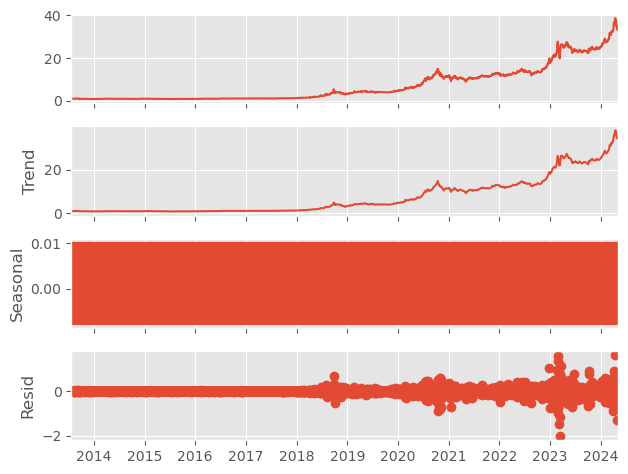

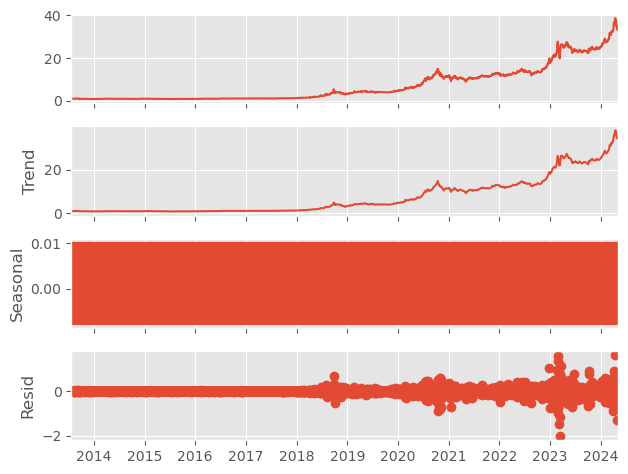

In [80]:
# Additive decomposition
decomposition = seasonal_decompose(prices, model='additive')
decomposition.plot()

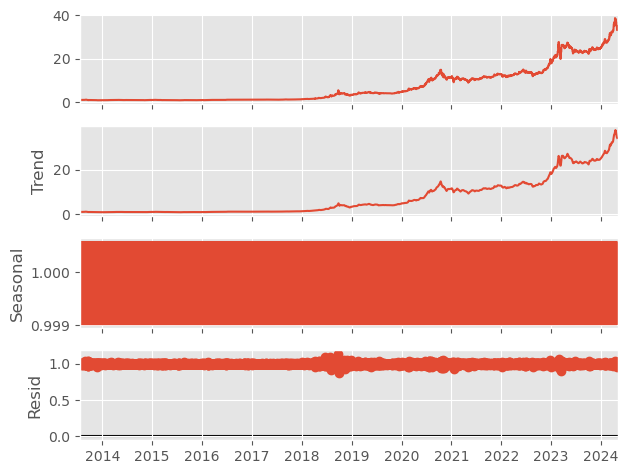

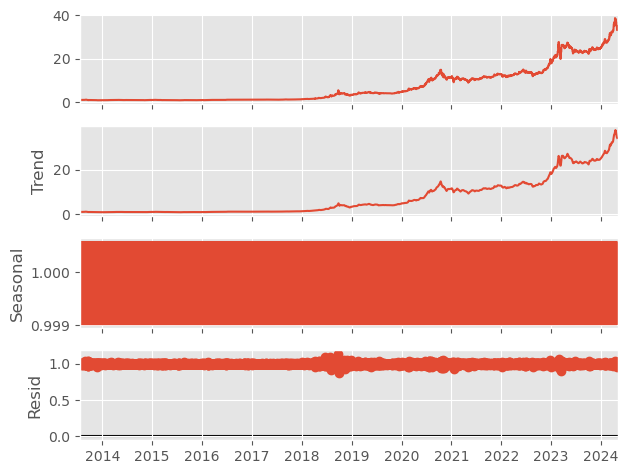

In [81]:
# Multiplicative decomposition
decomposition = seasonal_decompose(prices, model='multiplicative')
decomposition.plot()

In [82]:
# Looking at seasonality S[t] part of the decomposition:
decomposition.seasonal.describe()

# Basically no seasonality.

count    3938.000000
mean        1.000000
std         0.000517
min         0.999021
25%         0.999580
50%         1.000157
75%         1.000536
max         1.000570
Name: seasonal, dtype: float64

---
# Splitting the dataset into a training and a testing sets

In [83]:
len(prices)

3938

In [84]:
# 90-10 train-test split
training_len = int(0.9 * len(prices))

train = prices.iloc[0 : training_len]
test = prices.iloc[training_len : ]

In [85]:
train

Date
2013-07-22     1.000
2013-07-23     1.030
2013-07-24     1.020
2013-07-25     1.020
2013-07-26     1.030
               ...  
2023-03-31    26.406
2023-04-01    26.406
2023-04-02    25.767
2023-04-03    25.827
2023-04-04    25.952
Freq: D, Length: 3544, dtype: float64

In [86]:
test

Date
2023-04-05    25.490
2023-04-06    25.490
2023-04-07    25.485
2023-04-08    24.869
2023-04-09    24.899
               ...  
2024-04-28    33.265
2024-04-29    35.004
2024-04-30    34.570
2024-05-01    34.371
2024-05-02    34.487
Freq: D, Length: 394, dtype: float64

---
# Moving Average (MA)

In [87]:
# Calculating the 9-day moving average
sma_window = 9
sma_model = train.rolling(window=sma_window).mean()
sma_model

Date
2013-07-22          NaN
2013-07-23          NaN
2013-07-24          NaN
2013-07-25          NaN
2013-07-26          NaN
                ...    
2023-03-31    26.406000
2023-04-01    26.406000
2023-04-02    26.335000
2023-04-03    26.270667
2023-04-04    26.220222
Freq: D, Length: 3544, dtype: float64

In [88]:
# 'Forecasting' the next values based on the 7-day MA
last_sma_value = sma_model.iloc[-1]

sma_forecast = pd.Series([last_sma_value] * len(test), index=test.index)

print(sma_forecast)

Date
2023-04-05    26.220222
2023-04-06    26.220222
2023-04-07    26.220222
2023-04-08    26.220222
2023-04-09    26.220222
                ...    
2024-04-28    26.220222
2024-04-29    26.220222
2024-04-30    26.220222
2024-05-01    26.220222
2024-05-02    26.220222
Freq: D, Length: 394, dtype: float64


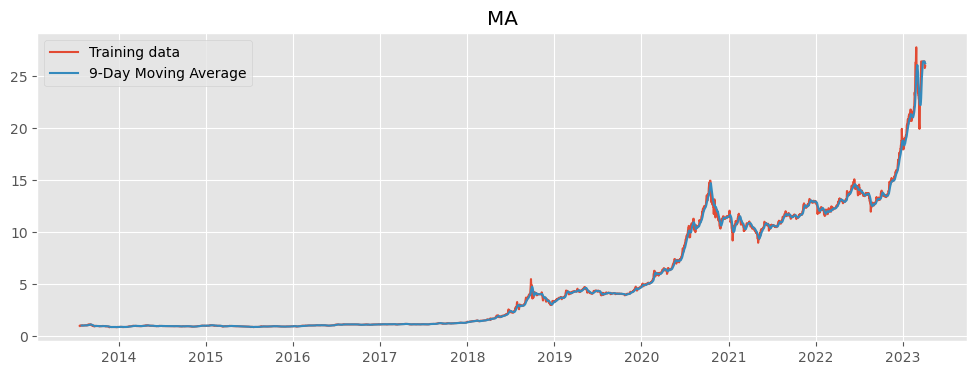

In [89]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Training data')
plt.plot(sma_model, label='9-Day Moving Average')
plt.legend(loc='best')
plt.title('MA')
plt.show()

In [90]:
test

Date
2023-04-05    25.490
2023-04-06    25.490
2023-04-07    25.485
2023-04-08    24.869
2023-04-09    24.899
               ...  
2024-04-28    33.265
2024-04-29    35.004
2024-04-30    34.570
2024-05-01    34.371
2024-05-02    34.487
Freq: D, Length: 394, dtype: float64

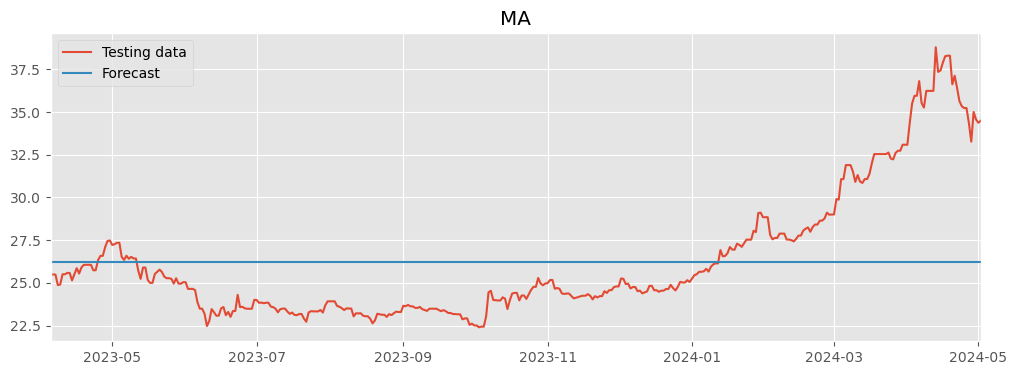

In [91]:
plt.figure(figsize=(12,4))
plt.plot(test, label='Testing data')
plt.plot(sma_forecast, label='Forecast')
plt.xlim(pd.Timestamp('2023-04-05'), pd.Timestamp('2024-05-02'))
plt.legend(loc='best')
plt.title('MA')
plt.show()

---
# Holt's Linear Trend Method

In [92]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [93]:
# Instantianting and fitting the model
exp_model = ExponentialSmoothing(train, trend='additive')
exp_results = exp_model.fit(optimized=True)

exp_forecast = exp_results.forecast(len(test))

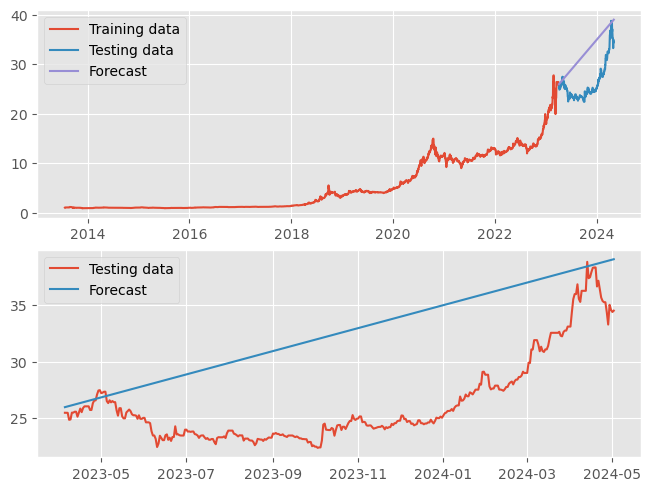

In [94]:
fig , axs = plt.subplots(2, 1, layout='constrained')

axs[0].plot(train, label='Training data')
axs[0].plot(test, label='Testing data')
axs[0].plot(exp_forecast, label='Forecast')
axs[0].legend(loc='best')

axs[1].plot(test, label='Testing data')
axs[1].plot(exp_forecast, label='Forecast')
axs[1].legend(loc='best')


plt.show()

---
# ARIMA

## Checking stationarity assumptions

### Testing for stationarity

In [95]:
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

adfuller(prices)

(3.193646857628821,
 1.0,
 29,
 3908,
 {'1%': -3.4320244115897567,
  '5%': -2.862279863367539,
  '10%': -2.5671638379687782},
 -2265.22595163218)

In [96]:
# Kwiatkowski-Phillips-Schmidt-Shin test
from statsmodels.tsa.stattools import kpss

kpss(prices)

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/673336790.py:4: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




(7.887194324779684,
 0.01,
 39,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### Box Cox Transformation

In [97]:
# Box Cox transoformation to make the variance constant
from scipy.stats import boxcox

prices_boxcox = pd.Series(boxcox(prices, lmbda=0), index=prices.index)

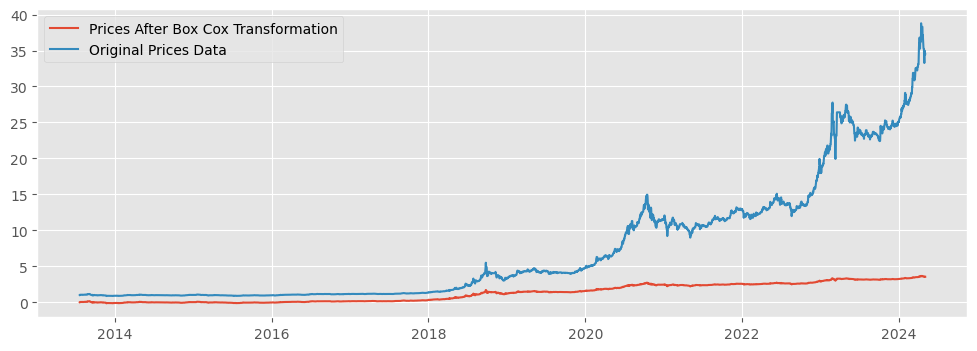

In [98]:
plt.figure(figsize=(12,4))
plt.plot(prices_boxcox, label='Prices After Box Cox Transformation')
plt.plot(prices, label='Original Prices Data')
plt.legend(loc='best')
plt.show()

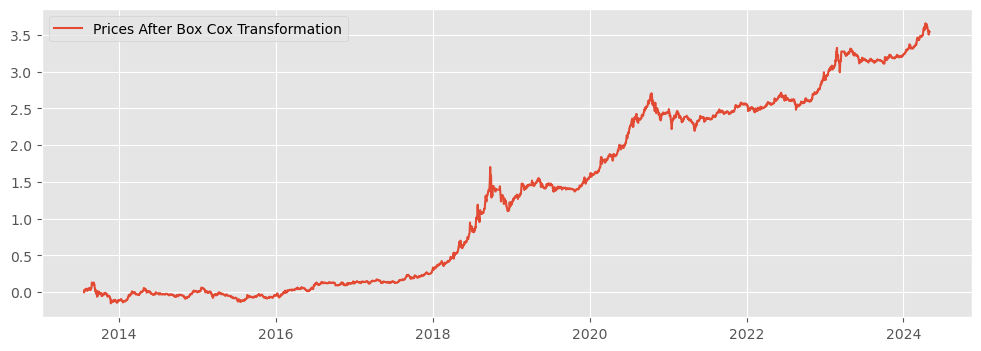

In [99]:
plt.figure(figsize=(12,4))
plt.plot(prices_boxcox, label='Prices After Box Cox Transformation')
plt.legend(loc='best')
plt.show()

### First Differencing

<Axes: xlabel='Date'>

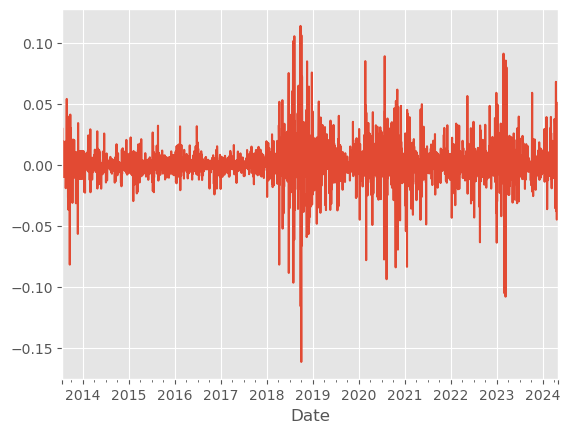

In [100]:
prices_boxcox_diff = pd.Series(prices_boxcox.diff(), index=prices_boxcox.index)
prices_boxcox_diff.dropna(inplace=True)

prices_boxcox_diff.plot()

### Testing for stationarity again

In [101]:
adfuller(prices_boxcox_diff)

(-16.28625104766913,
 3.373246129364501e-29,
 16,
 3920,
 {'1%': -3.432019282477582,
  '5%': -2.862277597629522,
  '10%': -2.5671626317810285},
 -21885.717461427354)

In [102]:
kpss(prices_boxcox_diff)

(0.44017432706157045,
 0.059838652128633436,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## Train-test split for the transformed data

In [103]:
training_len = int(0.9 * len(prices_boxcox_diff))

train_boxcox_diff = prices_boxcox_diff.iloc[0 : training_len]
test_boxcox_diff = prices_boxcox_diff.iloc[training_len : ]

## ARIMA model

In [104]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_boxcox_diff, order=(1,0,1))
arima_results = arima_model.fit()

arima_forecast = arima_results.forecast(len(test_boxcox_diff))

In [105]:
# Transforming the data back from differenced form

predicted_diff = pd.Series(arima_results.forecast(steps=len(test_boxcox_diff)), index=test_boxcox_diff.index)
predicted_boxcox = predicted_diff.cumsum() + prices_boxcox.iloc[training_len-1]

In [106]:
# Tranforming the data back from the Box Cox form

predicted_original = np.exp(predicted_boxcox)

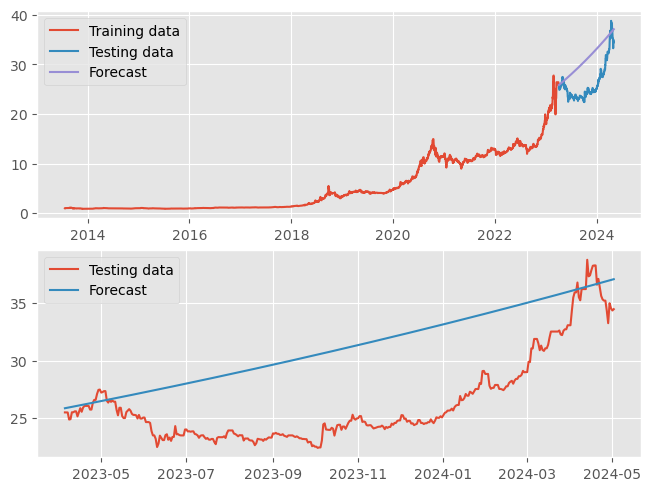

In [107]:
fig, axs = plt.subplots(2, 1, layout='constrained')

axs[0].plot(train, label='Training data')
axs[0].plot(test, label='Testing data')
axs[0].plot(predicted_original, label='Forecast')
axs[0].legend(loc='best')

axs[1].plot(test, label='Testing data')
axs[1].plot(predicted_original, label='Forecast')
axs[1].legend(loc='best')

plt.show()

---
# Comparison of the forecasting models

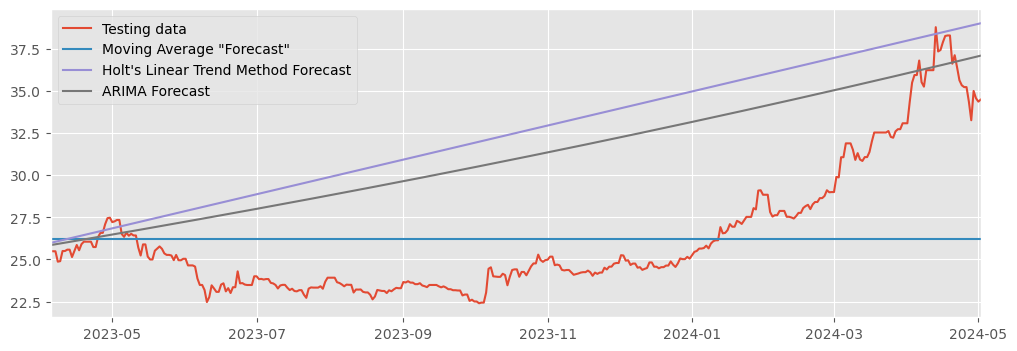

In [108]:
plt.figure(figsize=(12,4))
plt.plot(test, label='Testing data')
plt.plot(sma_forecast, label='Moving Average \"Forecast\"')
plt.plot(exp_forecast, label='Holt\'s Linear Trend Method Forecast')
plt.plot(predicted_original, label='ARIMA Forecast')
plt.xlim(pd.Timestamp('2023-04-05'), pd.Timestamp('2024-05-02'))
plt.legend(loc='best')
plt.show()

---
# RSI-based trading

**RSI (Relative Strength Index) Strategy**

- **Concept**: RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100.
- **Implementation**:
  - Calculate the RSI using closing prices.
  - **Signal**:
    - **Buy**: When the RSI drops below 30 (indicating oversold conditions).
    - **Sell**: When the RSI rises above 70 (indicating overbought conditions).

In [109]:
# Calculating the price difference
df['Price_diff'] = df['Close'].diff()
df.dropna(inplace=True)
df.reset_index()
df

,Open,Minimum,Maximum,Close,Date,Position,Day,Month,Year,Price_diff
1,1.030,1.030,1.030,1.030,2013-07-23,High,23,7,2013,0.030
2,1.020,1.020,1.020,1.020,2013-07-24,Low,24,7,2013,-0.010
3,1.030,1.030,1.030,1.030,2013-07-26,High,26,7,2013,0.010
4,1.040,1.040,1.040,1.040,2013-07-27,High,27,7,2013,0.010
5,1.030,1.030,1.030,1.030,2013-07-28,Low,28,7,2013,-0.010
...,...,...,...,...,...,...,...,...,...,...
3381,34.369,33.132,34.501,33.265,2024-04-28,Low,28,4,2024,-1.095
3382,33.263,33.240,35.216,35.004,2024-04-29,High,29,4,2024,1.739
3383,34.985,34.371,35.777,34.570,2024-04-30,Low,30,4,2024,-0.434
3384,34.600,34.013,34.600,34.371,2024-05-01,Low,1,5,2024,-0.199


In [110]:
# Filtering out the columns not needed
df = df[['Close' , 'Date' , 'Price_diff']]
df

,Close,Date,Price_diff
1,1.030,2013-07-23,0.030
2,1.020,2013-07-24,-0.010
3,1.030,2013-07-26,0.010
4,1.040,2013-07-27,0.010
5,1.030,2013-07-28,-0.010
...,...,...,...
3381,33.265,2024-04-28,-1.095
3382,35.004,2024-04-29,1.739
3383,34.570,2024-04-30,-0.434
3384,34.371,2024-05-01,-0.199


In [111]:
# Calculating the gain and loss
df['Gain'] = df['Price_diff'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Price_diff'].apply(lambda x: -x if x < 0 else 0)

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/1128925953.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/1128925953.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
df

,Close,Date,Price_diff,Gain,Loss
1,1.030,2013-07-23,0.030,0.030,0.000
2,1.020,2013-07-24,-0.010,0.000,0.010
3,1.030,2013-07-26,0.010,0.010,0.000
4,1.040,2013-07-27,0.010,0.010,0.000
5,1.030,2013-07-28,-0.010,0.000,0.010
...,...,...,...,...,...
3381,33.265,2024-04-28,-1.095,0.000,1.095
3382,35.004,2024-04-29,1.739,1.739,0.000
3383,34.570,2024-04-30,-0.434,0.000,0.434
3384,34.371,2024-05-01,-0.199,0.000,0.199


In [113]:
# Calculating average gains and losses
period = 14  # Default period for RSI
df['Avg_Gain'] = df['Gain'].rolling(window=period).mean()
df['Avg_Loss'] = df['Loss'].rolling(window=period).mean()

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/806492574.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/806492574.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [114]:
df

,Close,Date,Price_diff,Gain,Loss,Avg_Gain,Avg_Loss
1,1.030,2013-07-23,0.030,0.030,0.000,NaN,NaN
2,1.020,2013-07-24,-0.010,0.000,0.010,NaN,NaN
3,1.030,2013-07-26,0.010,0.010,0.000,NaN,NaN
4,1.040,2013-07-27,0.010,0.010,0.000,NaN,NaN
5,1.030,2013-07-28,-0.010,0.000,0.010,NaN,NaN
...,...,...,...,...,...,...,...
3381,33.265,2024-04-28,-1.095,0.000,1.095,0.286286,0.498571
3382,35.004,2024-04-29,1.739,1.739,0.000,0.228143,0.498571
3383,34.570,2024-04-30,-0.434,0.000,0.434,0.228143,0.426643
3384,34.371,2024-05-01,-0.199,0.000,0.199,0.222143,0.440857


In [115]:
# Calculating the the Relative Strength (RS)
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/2652256508.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
# Calculating the RSI
df['RSI'] = 100 - (100 / (1 + df['RS']))
df = df.dropna(subset=['RSI'])

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/1358644038.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
# Initializing the variables
buy_price = None
profit_loss = 0
trade_log = []

# Looping through the dataset to simulate buying and selling based on RSI indicator
for index, row in df.iterrows():
    rsi = row['RSI']
    close_price = row['Close']
    
    # Buy signal: RSI drops below 30 and we have not bought yet
    if rsi < 30 and buy_price is None:
        buy_price = close_price
        trade_log.append(f"BUY at {buy_price} on {row['Date']}")
    
    # Sell signal: RSI rises above 70 and we have a buy position
    elif rsi > 70 and buy_price is not None:
        profit_loss += close_price - buy_price  # Calculate profit/loss from the trade
        trade_log.append(f"SELL at {close_price} on {row['Date']} - Profit/Loss: {close_price - buy_price}")
        buy_price = None  # Reset buy_price after selling

# If there's an open position at the end, assume it's closed at the last available price
if buy_price is not None:
    profit_loss += df.iloc[-1]['Close'] - buy_price
    trade_log.append(f"CLOSE remaining position at {df.iloc[-1]['Close']} on {df.iloc[-1]['Date']} - Profit/Loss: {df.iloc[-1]['Close'] - buy_price}")

# Outputting the trade log and total profit/loss
trade_log, profit_loss

(['BUY at 1.04 on 2013-09-11 00:00:00',
  'SELL at 0.99 on 2013-10-29 00:00:00 - Profit/Loss: -0.050000000000000044',
  'BUY at 0.94 on 2013-11-08 00:00:00',
  'SELL at 0.9 on 2014-01-07 00:00:00 - Profit/Loss: -0.039999999999999925',
  'BUY at 0.87 on 2014-01-19 00:00:00',
  'SELL at 0.90632 on 2014-02-07 00:00:00 - Profit/Loss: 0.03632000000000002',
  'BUY at 0.97188 on 2014-03-25 00:00:00',
  'SELL at 0.99035 on 2014-04-09 00:00:00 - Profit/Loss: 0.018469999999999986',
  'BUY at 0.99312 on 2014-05-10 00:00:00',
  'SELL at 0.93637 on 2014-11-21 00:00:00 - Profit/Loss: -0.05674999999999997',
  'BUY at 0.99864 on 2014-12-31 00:00:00',
  'SELL at 1.03439 on 2015-01-16 00:00:00 - Profit/Loss: 0.03574999999999995',
  'BUY at 1.02747 on 2015-02-04 00:00:00',
  'SELL at 0.97788 on 2015-04-07 00:00:00 - Profit/Loss: -0.049590000000000134',
  'BUY at 0.97558 on 2015-04-27 00:00:00',
  'SELL at 0.89739 on 2015-08-07 00:00:00 - Profit/Loss: -0.07818999999999998',
  'BUY at 0.93107 on 2015-09-16

---
# Finding the Optimal RSI Period

In [119]:
# Defining a range of periods to test
periods_to_test = range(2, 91)

In [120]:
# Initializing a results dictionary to store profit/loss for each period
results = {}

# Looping through each period value
for period in periods_to_test:
    # Calculating average gains and losses
    df['Avg_Gain'] = df['Gain'].rolling(window=period).mean()
    df['Avg_Loss'] = df['Loss'].rolling(window=period).mean()

    df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
    df['RSI'] = 100 - (100 / (1 + df['RS']))
    
    # Drop rows with NaN RSI values
    df = df.dropna(subset=['RSI'])

    # Initializing variables
    buy_price = None
    profit_loss = 0
    trade_log = []

    # As before we loop through the dataset to simulate buying and selling based on RSI values
    for index, row in df.iterrows():
        rsi = row['RSI']
        close_price = row['Close']
        
        # Buy signal: RSI drops below 30 and we have not bought yet
        if rsi < 30 and buy_price is None:
            buy_price = close_price
            trade_log.append(f"BUY at {buy_price} on {row['Date']}")
        
        # Sell signal: RSI rises above 70 and we have a buy position
        elif rsi > 70 and buy_price is not None:
            profit_loss += close_price - buy_price  # Calculate profit/loss from the trade
            trade_log.append(f"SELL at {close_price} on {row['Date']} - Profit/Loss: {close_price - buy_price}")
            buy_price = None  # Reset buy_price after selling

    # If there's an open position at the end, assume it's closed at the last available price
    if buy_price is not None:
        profit_loss += df.iloc[-1]['Close'] - buy_price
        trade_log.append(f"CLOSE remaining position at {df.iloc[-1]['Close']} on {df.iloc[-1]['Date']} - Profit/Loss: {df.iloc[-1]['Close'] - buy_price}")

    # Storing the results for this period
    results[period] = {
        'trade_log': trade_log,
        'profit_loss': profit_loss
    }

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/2243191981.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/2243191981.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/9f/pv1nlhw528d_5zttzbkb_h5m0000gn/T/ipykernel_22619/2243191981.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [121]:
data_list = []

for period in periods_to_test:
    data_list.append({
        'Rolling Period' : period,
        'Profit/Loss' : results[period]['profit_loss']
    })

data = pd.DataFrame(data_list)

In [122]:
px.line(data, x='Rolling Period', y='Profit/Loss')